In [30]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats('svg')

In [31]:
nPerClust = 100

def create_data(nPerClust = 100):

    blur = 1

    #     x, y
    A = [ 1, 1] # centroid category 1
    B = [ 5, 1] # centroid category 2

    a = [ A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur ]
    b = [ B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur ]

    labels_np = np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust,1))))

    data_np = np.hstack((a, b)).T

    data = torch.tensor(data_np).float()
    labels = torch.tensor(labels_np).float()

    return data, labels


In [32]:
data, labels = create_data()

In [33]:
numepochs = 1000

def classifier(learningRate, numepochs):
    ANNclassify = nn.Sequential(
        nn.Linear(2, 1), # input layer (number of inputs = 2 (x, y), number of outputs)
        nn.ReLU(), # activation unit
        nn.Linear(1, 1), # output layer
        #nn.Sigmoid() # final activation unit
    )
    
    lossFun = nn.BCEWithLogitsLoss()
    # Note : it is recommend to use BCEWithLogitsLoss function without explicitly adding the Sigmoid to the model
    # BCEWithLogitsLoss internally use Sigmoid and this is more stable
    optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)

    losses = torch.zeros(numepochs)

    for epochi in range(numepochs):

        yhat = ANNclassify(data) # forward pass

        loss = lossFun(yhat, labels) # compute the loss
        losses[epochi] = loss

        # backprop
        optimizer.zero_grad() # initialize gradients to zeros
        loss.backward()
        optimizer.step()
    
    predictions = ANNclassify(data)

    predlabels = predictions > 0

    # find errors
    misclassified = np.where(predlabels != labels)[0]

    totalacc = 100 - (100 * len(misclassified)/(2*nPerClust))

    return totalacc, losses
    

In [34]:
learning_rate = np.linspace(0.001, 0.2, 40)

allLosses = np.zeros((learning_rate.shape[0], numepochs))
allAcc = np.zeros(learning_rate.shape[0])

In [35]:
for i, lr in enumerate(learning_rate):

    totalacc, losses = classifier(lr, numepochs)
    allLosses[i, :] = losses.detach()
    allAcc[i] = totalacc
    print(i)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


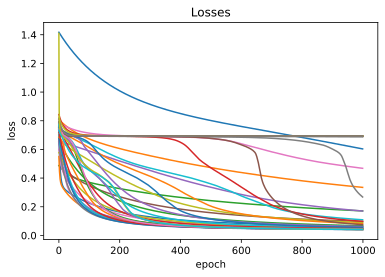

In [36]:
for i in range(learning_rate.shape[0]):

    plt.plot(allLosses[i,:])

plt.title('Losses')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

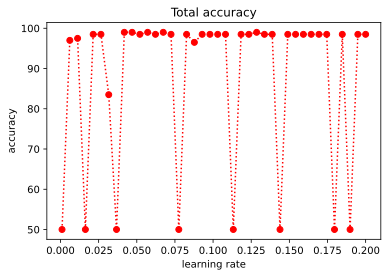

In [37]:
plt.plot(learning_rate,allAcc, 'ro:')
plt.title('Total accuracy')
plt.ylabel('accuracy')
plt.xlabel('learning rate')
plt.show()

In [38]:
float(sum(allAcc > 70)/allAcc.shape)

0.8

# Run above experiment N times

In [53]:
learning_rate = np.linspace(0.001, 0.1, 20)
noExps = 10
allAcc = np.zeros((noExps, learning_rate.shape[0]))

for e in  range(noExps):
    for l, lr in enumerate(learning_rate):

        totalacc, _ = classifier(lr, 500)
        allAcc[e, l] = totalacc
        print(e,l)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
7 19
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
9 15
9 16
9 17
9 18
9 19


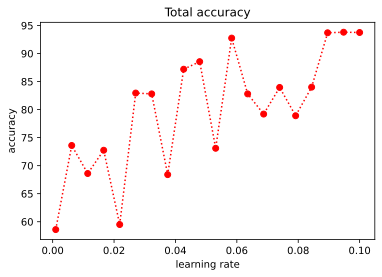

In [58]:
plt.plot(learning_rate,np.mean(allAcc, axis=0), 'ro:')
plt.title('Total accuracy')
plt.ylabel('accuracy')
plt.xlabel('learning rate')
plt.show()